# UTS

## SOAl NOMOR 1

Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM

## Dataset

In [1]:
import pandas as pd

# Ganti path sesuai lokasi file kamu
df = pd.read_csv("Beritauts.csv")

# Melihat struktur data
print("Jumlah baris dan kolom:", df.shape)
print("\nNama kolom:", df.columns.tolist())

# Lihat 5 data pertama
df.head()


Jumlah baris dan kolom: (1500, 6)

Nama kolom: ['No', 'judul', 'berita', 'tanggal', 'kategori', 'link']


,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...


## Preprocessing

In [2]:
!pip install Sastrawi nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Ambil stopword otomatis
stop_factory = StopWordRemoverFactory()
stop_id = set(stop_factory.get_stop_words())
stop_en = set(stopwords.words('english'))
stops = stop_id.union(stop_en)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)        # hapus URL
    text = re.sub(r"[^a-z\s]", " ", text)       # hapus simbol
    text = re.sub(r"\s+", " ", text).strip()    # hapus spasi berlebih
    tokens = [t for t in text.split() if t not in stops and len(t) > 2]
    return " ".join(tokens)

# Kolom teks dan label
text_col = "berita"
label_col = "kategori"

df["cleaned_text"] = df[text_col].apply(clean_text)

df[[text_col, "cleaned_text", label_col]].head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,berita,cleaned_text,kategori
0,Menteri Koordinator (Menko) Bidang Perekonomia...,menteri koordinator menko bidang perekonomian ...,Ekonomi
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...",rangka memeriahkan hari jadi surabaya industri...,Ekonomi
2,Wacana Presiden Prabowo Subianto akan membentu...,wacana presiden prabowo subianto membentuk mem...,Ekonomi
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,bpjs ketenagakerjaan kementerian agama kemenag...,Ekonomi
4,Pemerintah akan segera membentuk Satuan Tugas ...,pemerintah segera membentuk satuan tugas pemut...,Ekonomi
5,Menko Bidang Infrastruktur dan Pembangunan Kew...,menko bidang infrastruktur pembangunan kewilay...,Ekonomi
6,Kepala Badan Gizi Nasional Dadan Hindayana men...,kepala badan gizi nasional dadan hindayana men...,Ekonomi
7,Menteri Koordinator Bidang Pangan Zulkifli Has...,menteri koordinator bidang pangan zulkifli has...,Ekonomi
8,Uji coba alias commissioning pembangkit listri...,uji coba alias commissioning pembangkit listri...,Ekonomi
9,Anak crazy rich pengusaha sawit Kalimantan Sam...,anak crazy rich pengusaha sawit kalimantan sam...,Ekonomi


# Topik Modelling LDA

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [5]:
# --- Distribusi proporsi topik di setiap dokumen ---
topic_distribution = lda.transform(dtm)

# Jadikan DataFrame agar mudah dibaca
import pandas as pd
topic_df = pd.DataFrame(
    topic_distribution,
    columns=[f"Topik_{i+1}" for i in range(lda.n_components)]
)

# Gabungkan dengan data asli (opsional)
berita_topics = pd.concat([df[['judul', 'kategori']], topic_df], axis=1)

print(berita_topics.head(10).to_markdown(index=False))

| judul                                                                 | kategori   |     Topik_1 |     Topik_2 |     Topik_3 |     Topik_4 |   Topik_5 |
|:----------------------------------------------------------------------|:-----------|------------:|------------:|------------:|------------:|----------:|
| Airlangga Harap Kenaikan UMP Tingkatkan Daya Beli Masyarakat Menengah | Ekonomi    | 0.000669931 | 0.101171    | 0.000671041 | 0.000663918 |  0.896824 |
| PT SIER Beri Penghargaan untuk 50 Tenant Terbaik di HUT ke-50         | Ekonomi    | 0.000621336 | 0.000616274 | 0.0360579   | 0.0114779   |  0.951227 |
| Prabowo Bakal Bentuk Kementerian Penerimaan Negara, Dipimpin Anggito  | Ekonomi    | 0.000791964 | 0.000769994 | 0.000781798 | 0.000772788 |  0.996883 |
| Sinergi Kemenag & BPJS Ketenagakerjaan Lindungi 165 Ribu GTK Madrasah | Ekonomi    | 0.0435184   | 0.00103197  | 0.00104182  | 0.00103566  |  0.953372 |
| Pemerintah Segera Bentuk Satgas PHK Usai Tetapkan UMP Naik 6,5 Perse

## Ekstraksi Fitur tambahan dengan TF-IDF (untuk classifier)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['kategori']

## Data Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Klasifikasi

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Naïve Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("=== Hasil Klasifikasi Naïve Bayes ===")
print(classification_report(y_test, y_pred_nb))

print("\n=== Hasil Klasifikasi SVM ===")
print(classification_report(y_test, y_pred_svm))

=== Hasil Klasifikasi Naïve Bayes ===
               precision    recall  f1-score   support

      Ekonomi       0.92      0.97      0.95        73
Internasional       0.96      0.98      0.97        84
     Nasional       0.97      0.91      0.94        70
     Olahraga       1.00      0.99      0.99        73

     accuracy                           0.96       300
    macro avg       0.96      0.96      0.96       300
 weighted avg       0.96      0.96      0.96       300


=== Hasil Klasifikasi SVM ===
               precision    recall  f1-score   support

      Ekonomi       0.96      0.92      0.94        73
Internasional       0.94      0.96      0.95        84
     Nasional       0.92      0.94      0.93        70
     Olahraga       1.00      0.99      0.99        73

     accuracy                           0.95       300
    macro avg       0.95      0.95      0.95       300
 weighted avg       0.95      0.95      0.95       300



## Confusion Matriks

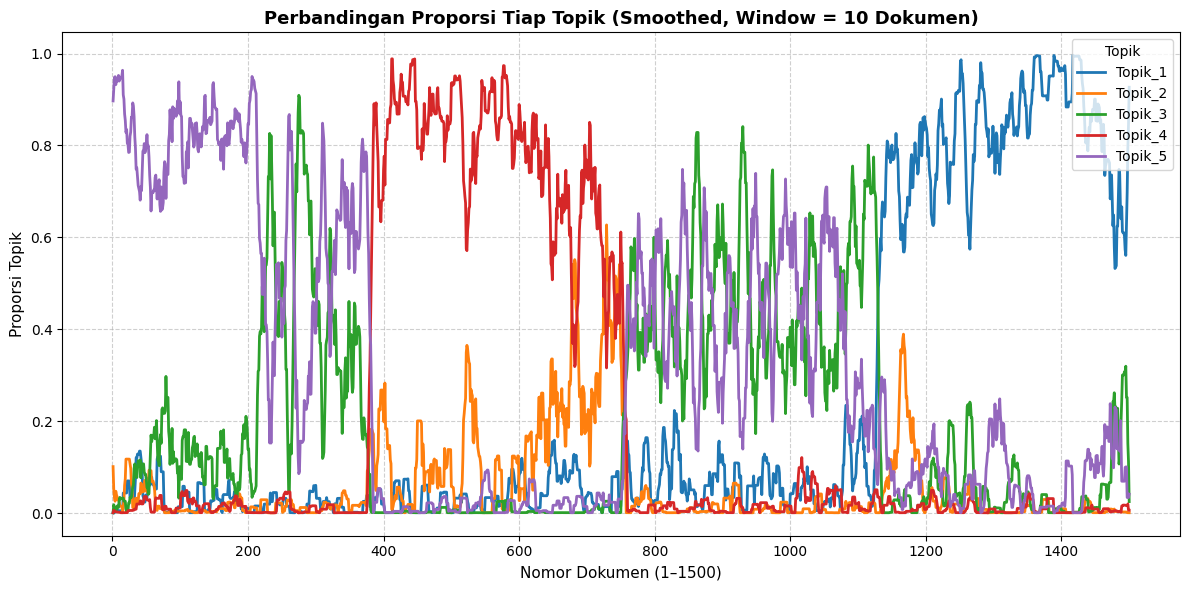

In [9]:
import matplotlib.pyplot as plt

# Ambil hanya kolom proporsi topik
topik_cols = [f"Topik_{i+1}" for i in range(5)]
topik_data = berita_topics[topik_cols]

# Hitung rata-rata bergerak (rolling mean) untuk menghaluskan grafik
# Window=10 artinya rata-rata dari 10 dokumen berurutan
topik_data_smooth = topik_data.rolling(window=10, min_periods=1).mean()

# Plot line chart
plt.figure(figsize=(12,6))
for col in topik_cols:
    plt.plot(
        range(1, len(topik_data_smooth)+1),
        topik_data_smooth[col],
        label=col,
        linewidth=2.0
    )

# Pengaturan visualisasi
plt.title("Perbandingan Proporsi Tiap Topik (Smoothed, Window = 10 Dokumen)", fontsize=13, fontweight='bold')
plt.xlabel("Nomor Dokumen (1–1500)", fontsize=11)
plt.ylabel("Proporsi Topik", fontsize=11)
plt.legend(title="Topik", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## SOAL NOMOR 2

Lakukan  analisa clutering dokumen pada data email berikut

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


📊 Jumlah data: 5572
   id                                               Text Unnamed: 2  \
0   1  Go until jurong point, crazy.. Available only ...        NaN   
1   2                      Ok lar... Joking wif u oni...        NaN   
2   3  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   4  U dun say so early hor... U c already then say...        NaN   
4   5  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

✅ Contoh hasil preprocessing:
   id                                         clean_text
0   1  go jurong point crazi avail bugi n great world...
1   2                              ok lar joke wif u oni
2   3  free entri wkli comp win fa cup final tkt st m...
3   4                u dun say earli hor u c alreadi say
4   5          nah dont think goe usf live around though

   id  abiola  abl  abt

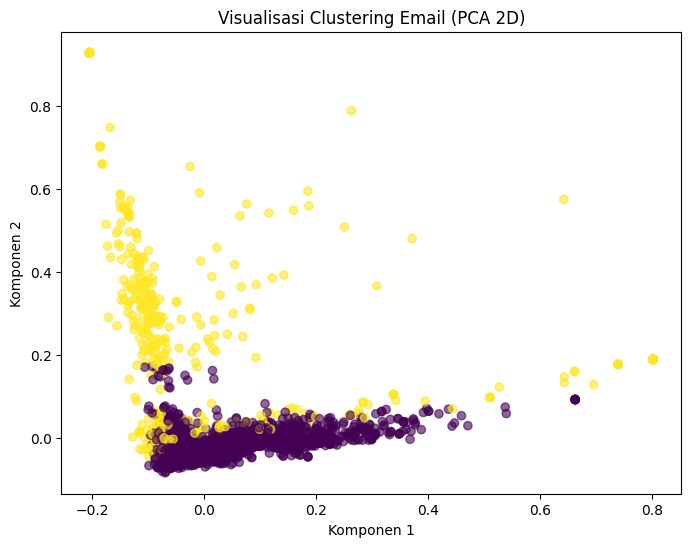


Contoh isi Cluster 0
1. Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat......

2. Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's...

3. U dun say so early hor... U c already then say......


Contoh isi Cluster 1
1. Ok lar... Joking wif u oni......

2. Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?...

3. Yup... Ok i go home look at the timings then i msg Ì_ again... Xuhui going to learn on 2nd may too but her lesson is at 8am...



In [20]:
# Import library
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

#  Load data
df = pd.read_csv("spamuts.csv", encoding='latin-1')
print("📊 Jumlah data:", len(df))
print(df.head())

# Pastikan kolom sesuai
df = df[['id', 'Text']]
df.columns = ['id', 'email_text']

# 3️⃣ Preprocessing teks
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['email_text'].astype(str).apply(preprocess)

print("\n✅ Contoh hasil preprocessing:")
print(df[['id', 'clean_text']].head())

# 4️⃣ Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text'])
print("")
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Gabungkan langsung dengan kolom id (dan teks jika ingin)
tfidf_matrix = pd.concat([df[['id']], tfidf_df], axis=1)

print(tfidf_matrix.head())
tfidf_matrix.to_csv("tfidf_matrix.csv", index=False)
print("\n💾 Matriks TF-IDF disimpan ke 'tfidf_matrix_full.csv'")


print("\n🔢 Bentuk matriks TF-IDF:", X.shape)

#  Clustering dengan K-Means
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"\n📈 Silhouette Score: {sil_score:.4f}")

# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2, random_state=42)
reduced_X = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Visualisasi Clustering Email (PCA 2D)')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

# Analisis isi tiap cluster
for i in range(k):
    print(f"\n==============================")
    print(f"Contoh isi Cluster {i}")
    print("==============================")
    sample = df[df['cluster'] == i]['email_text'].head(3).values
    for j, text in enumerate(sample, 1):
        print(f"{j}. {text[:200]}...\n")